<a href="https://colab.research.google.com/github/dilinanp/ml-galaxy/blob/main/galaxy_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary Python libraries and functions.

In [ ]:
# Run the following code by hitting the "play" button on the left.

import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

plt.rcParams['image.cmap']='gray'

# Download the dataset
The dataset will be downloaded as a single file named ``galaxy_small.h5``.

In [ ]:
# Run the following code by hitting the "play" button on the left.

!wget -O galaxy_small.h5 "https://www.dropbox.com/scl/fi/htzz25s95sjnyfm0ofvfn/galaxy_small.h5?dl=0&rlkey=586kuytxtxvwsvz1q8a47az0m"

--2023-11-11 04:28:29--  https://www.dropbox.com/scl/fi/htzz25s95sjnyfm0ofvfn/galaxy_small.h5?dl=0&rlkey=586kuytxtxvwsvz1q8a47az0m
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uca0813affb66244d8a3c4970046.dl.dropboxusercontent.com/cd/0/inline/CHQMC6mA4afpQT0PHD7-bw7C5enGjfGca-OcpBSY8jXMUoB2NtrIHXLqk1xvFp-i6Mkor3WlF4BOoyKt_JqVNt_1HZeSQ9J3HfCaDuzryXKbHYmRYknSSFKwYMxkncoR47Y/file# [following]
--2023-11-11 04:28:30--  https://uca0813affb66244d8a3c4970046.dl.dropboxusercontent.com/cd/0/inline/CHQMC6mA4afpQT0PHD7-bw7C5enGjfGca-OcpBSY8jXMUoB2NtrIHXLqk1xvFp-i6Mkor3WlF4BOoyKt_JqVNt_1HZeSQ9J3HfCaDuzryXKbHYmRYknSSFKwYMxkncoR47Y/file
Resolving uca0813affb66244d8a3c4970046.dl.dropboxusercontent.com (uca0813affb66244d8a3c4970046.dl.dropboxusercontent.com)... 162.125.5.15, 2620:100:601f:15::a27d:90f
Connecting to

# Read the dataset and store the images and labels in seperate arrays.
The images will be stored in an array named ``images``.

The labels will be stored in an array named ``labels``.


In [ ]:
# Run the following code by hitting the "play" button on the left.

with h5py.File("galaxy_small.h5", 'r') as f:
    images = np.array(f['images'])
    labels = np.array(f['labels'])

--------------------------------------------------------------------------------
# Explore the ``images`` and ``labels`` arrays to get an idea about the dataset.
Our dataset consists of 3000 grayscale images of galaxies and the corresponding labels.

There are three types of galaxies in the dataset:

| Galaxy Type | Label | Number of Images |
| ----------- |:-----:|:----------------:|
| Round       |   0   |       1000       |
| Sprial      |   1   |       1000       |
| Edge-on     |   2   |       1000       |


### Print the label of the first image.
Note that array indices start from 0 in Python.

In [ ]:
# Type your code here.

labels[0]

2

### Print the labels of the first 20 images.

In [ ]:
# Type your code here.

labels[0:20]

array([2, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 2, 2])

### Print the first image.

In [ ]:
# Type your code here.
images[0]

array([[0.16660462, 0.11927897, 0.10883152, ..., 0.09850604, 0.1867404 ,
        0.1129946 ],
       [0.1391312 , 0.13929194, 0.09971969, ..., 0.11649208, 0.11066705,
        0.14131445],
       [0.08808996, 0.10971772, 0.13360112, ..., 0.16597291, 0.13306754,
        0.13238673],
       ...,
       [0.14464406, 0.11510055, 0.10244692, ..., 0.12762166, 0.11882676,
        0.10672898],
       [0.08792547, 0.128603  , 0.12096338, ..., 0.13224414, 0.10002639,
        0.14350475],
       [0.14353749, 0.11339012, 0.08845028, ..., 0.09452755, 0.12479791,
        0.08533168]])

### Display the first image as an actual image using the ``imshow()`` function.
See if you can identify what type of galaxy it is (round, spiral, or edge-on).


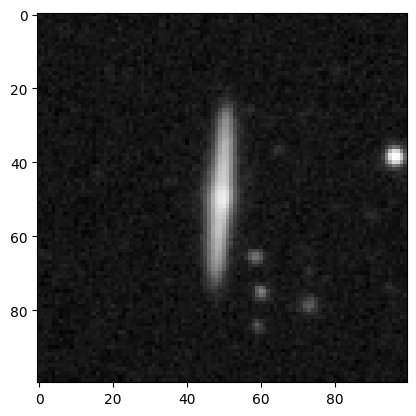

In [ ]:
# Type your code here.

imshow(images[0])

### Print the label of the first image and see if you had guessed the galaxy type correctly.
Remember that the labels corresponding to different galaxy types are,

| Galaxy Type | Label |
| ----------- |:-----:|
| Round       |   0   |
| Sprial      |   1   |
| Edge-on     |   2   |

In [ ]:
# Type your code here.

labels[0]

2

--------------------------------------------------------------------------------
# Prepare the dataset for machine learning models.




### Step 1: "Flatten" the images.
Since our images are 2D arrays, we cannot directly feed them into machine learning models.

We will first need to convert each 100 X 100 array into a 1D array of size 10,000.

This can be achieved using the ``reshape()`` function.

In [ ]:
# Run the following code.

flat_images = images.reshape(3000, 100*100)

### Step 2: Split the dataset into a training set and a test set
We will use the first 2000 images/labels for training, and the remaining 1000 images/labels for testing.

Split the ``images`` array into two arrays:

first 2000 images &rarr; ``X_train``

last 1000 images &rarr; ``X_test``



In [ ]:
# Type your code here.

X_train = flat_images[0:2000]
X_test = flat_images[2000:3000]

Split the ``labels`` array into two arrays:

first 2000 labels &rarr; ``y_train``

last 1000 labels &rarr; ``y_test``

In [ ]:
# Type your code here.

y_train = labels[0:2000]
y_test = labels[2000:3000]

--------------------------------------------------------------------------------
# Apply the machine learning model (K-Nearest Neighbors)

Let us apply a simple machine learning model called K-Nearest Neighbors (KNN). \


### Step 1: Import the KNN model from the scikit-learn (``sklearn``) library and initialize it.

In [ ]:
# Import the KNN model
from sklearn.neighbors import KNeighborsClassifier

# Type code to initialize the model.
knn = KNeighborsClassifier()

### Step 2: Train the KNN model using the training images (``X_train``) and training labels (``y_train``)

We can use the ``fit()`` function to train the model.

In [ ]:
# Type your code here

knn.fit(X_train, y_train)

KNeighborsClassifier()

### Step 3: Predict the labels for the test images (``X_test``)

You can use the ``predict()`` function to predict the labels.

Assign the resulting predicted labels to a variable named ``y_pred``.

In [ ]:
# Type your code here

y_pred = knn.predict(X_test)

### Compare the predicted labels and the true labels for the first 20 test images.
See if the machine learning model has done a good job at predicting labels of the first 20 test images.

In [ ]:
# Write code to print the first 20 elements in the y_pred array.
y_pred[0:20]

array([2, 0, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 1, 0, 2, 2])

In [ ]:
# Write code to print the first 20 elements in the y_test array.
y_test[0:20]

array([2, 0, 1, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1, 2, 2])

### Calculate the test accuracy
One way to evaluate the performance of the machine learning model is to calculate the "test accuracy", which is the fraction of predictions our model got right.

We can use the ``accuracy_score()`` function in the scikit-learn library to calculate the test accuracy.

In [ ]:
# Import the accuracy_score function.
from sklearn.metrics import accuracy_score

# Write code to calculate and print the test accuracy
accuracy_score(y_test, y_pred)

0.839

--------------------------------------------------------------------------------
# Apply another machine learning model (Support Vector Machines)

We will now apply another machine learning model called Support Vector Machines (SVM). \

### Step 1: Import the SVM model from the scikit-learn library and initialize it.

In [ ]:
# Import the SVM model
from sklearn.svm import SVC

# Type code to initialize the model.
svm = SVC()

### Step 2: Train the SVM model using the training images (``X_train``) and training labels (``y_train``)

In [ ]:
# Type your code here

svm.fit(X_train, y_train)

SVC()

### Step 3: Predict the labels for the test images (``X_test``)

In [ ]:
# Type your code here

y_pred = svm.predict(X_test)

### Calculate the test accuracy using the ``accuracy_score()`` function


In [ ]:
# Write code to calculate and print the test accuracy
accuracy_score(y_test, y_pred)

0.876